In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv ('1-FirstTenSignals.csv')
df1.head()

,I01,I02,I03,I04,I05,I06,I07,I08,I09,I10
0,3.970588,2.333333,3.966378,3.379443,-1.891451,1.758333,-0.195833,3.284109,3.925197,1.775591
1,3.954248,2.330065,3.978866,3.378482,-1.892411,1.770833,-0.187500,3.268058,3.937008,1.771654
2,3.934641,2.297386,3.970221,3.381364,-1.890490,1.775000,-0.204167,3.264848,3.956693,1.771654
3,3.950980,2.281046,3.961575,3.381364,-1.887608,1.766667,-0.200000,3.264848,3.984252,1.783465
4,4.013072,2.290850,3.932757,3.365034,-1.883766,1.787500,-0.191667,3.258427,4.000000,1.755906


# I03

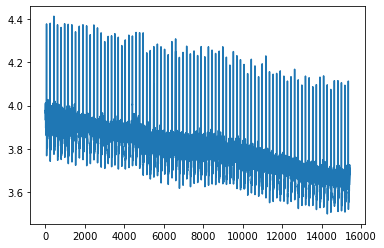

In [3]:
signal = df1['I03']

plt.plot(signal)

In [4]:
# estraggo i R peaks

freq = 257
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)

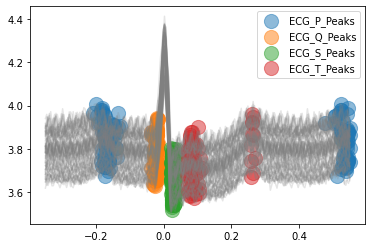

In [5]:
# estraggo tutti gli altri punti di interesse
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

### Calcolo la media della distanza tra gli R peaks

In [7]:
rpeaks

{'ECG_R_Peaks': array([  242,   428,   613,   793,   973,  1154,  1339,  1525,  1715,
         1901,  2087,  2272,  2454,  2637,  2821,  3003,  3178,  3350,
         3517,  3691,  3867,  4045,  4226,  4407,  4591,  4771,  4952,
         5132,  5311,  5490,  5672,  5855,  6037,  6220,  6406,  6596,
         6785,  6971,  7156,  7343,  7528,  7710,  7891,  8074,  8258,
         8441,  8621,  8804,  8986,  9167,  9345,  9522,  9699,  9881,
        10062, 10244, 10430, 10616, 10799, 10982, 11167, 11352, 11533,
        11714, 11897, 12080, 12261, 12441, 12624, 12808, 12990, 13174,
        13359, 13543, 13726, 13908, 14093, 14277, 14457, 14637, 14818,
        14996, 15171, 15345]),
 'sampling_rate': 257}

In [6]:
picchi = rpeaks['ECG_R_Peaks']
length = len(picchi)

sum = 0

for i in range(length - 1):
    sum += picchi[i + 1] - picchi[i]
    
semi_period = int(sum/(length - 1)/2)
semi_period

90

In [7]:
print("numero battiti: " + str(length))

period = semi_period*2+1
period


numero battiti: 84


181

In [8]:
single_hb = np.zeros([period,length])

# ogni colonna è un battito

# balzo il primo battio 
for i in range(length - 1):
    single_hb[:,i] = signal[picchi[i]-semi_period:picchi[i]+semi_period + 1]
    

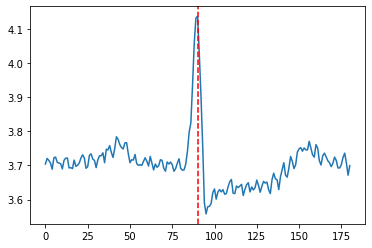

In [9]:
i = 65

plt.plot(single_hb[:,i])
plt.axvline(x = semi_period, color='r', linestyle='--')

In [10]:
for i in range(length):
    vertical_shift = (single_hb[0,i] + single_hb[-1,i])/2
    single_hb[:,i] -= vertical_shift


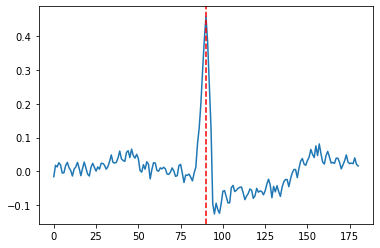

In [11]:
i = 82

plt.plot(single_hb[:,i])
plt.axvline(x = semi_period, color='r', linestyle='--')

In [14]:
hb_dic = {}

for i in range(length -1):
    hb_dic[i] = single_hb[:,i]

df = pd.DataFrame(hb_dic)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.010567,0.014890,0.003842,0.007205,-0.010086,-0.005764,-0.000480,0.017291,-0.004803,0.009126,...,0.006724,0.011527,0.000480,0.000000,0.005283,0.008165,0.012488,-0.008165,0.017291,-0.015850
1,-0.033622,0.020653,0.035543,0.023535,0.028338,0.052834,0.021614,0.036503,-0.006724,0.011047,...,-0.011527,0.001921,-0.020653,-0.002882,0.010086,0.001441,-0.013449,0.016811,0.012488,0.017771
2,-0.006724,0.048511,0.071085,0.083093,0.068684,0.048031,0.048511,-0.030740,0.004803,0.005283,...,0.018252,0.006724,-0.011047,0.015370,-0.012968,-0.034102,-0.001921,0.027378,0.017291,0.012968
3,0.018252,0.056196,0.078770,0.099424,0.071566,0.008646,0.026417,-0.065322,-0.025937,-0.003362,...,0.018252,-0.004803,0.008165,0.024976,-0.014890,-0.016811,0.010567,-0.007205,0.014409,0.025456
4,0.043228,0.056196,0.051873,0.048511,0.030259,-0.034582,-0.036984,-0.039385,-0.023055,-0.001441,...,-0.004803,-0.004803,0.004323,0.012488,-0.000480,-0.006244,0.030740,-0.008165,0.033622,0.018732


In [15]:
# calcolo la media di questo segnale

df['mean'] = df.mean(axis = 1)

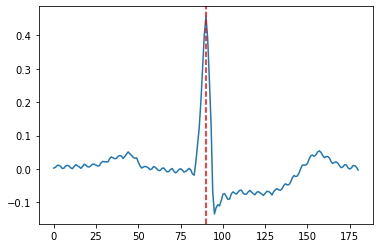

In [22]:
plt.plot(df['mean'])
plt.axvline(x = semi_period, color='r', linestyle='--')

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,mean
0,-0.010567,0.014890,0.003842,0.007205,-0.010086,-0.005764,-0.000480,0.017291,-0.004803,0.009126,...,0.011527,0.000480,0.000000,0.005283,0.008165,0.012488,-0.008165,0.017291,-0.015850,0.002830
1,-0.033622,0.020653,0.035543,0.023535,0.028338,0.052834,0.021614,0.036503,-0.006724,0.011047,...,0.001921,-0.020653,-0.002882,0.010086,0.001441,-0.013449,0.016811,0.012488,0.017771,0.005179
2,-0.006724,0.048511,0.071085,0.083093,0.068684,0.048031,0.048511,-0.030740,0.004803,0.005283,...,0.006724,-0.011047,0.015370,-0.012968,-0.034102,-0.001921,0.027378,0.017291,0.012968,0.010735
3,0.018252,0.056196,0.078770,0.099424,0.071566,0.008646,0.026417,-0.065322,-0.025937,-0.003362,...,-0.004803,0.008165,0.024976,-0.014890,-0.016811,0.010567,-0.007205,0.014409,0.025456,0.011360
4,0.043228,0.056196,0.051873,0.048511,0.030259,-0.034582,-0.036984,-0.039385,-0.023055,-0.001441,...,-0.004803,0.004323,0.012488,-0.000480,-0.006244,0.030740,-0.008165,0.033622,0.018732,0.007772


In [17]:
df.to_csv(r'HB_I03/Signals.csv', index = False)

Da questo shift devo determinare gli altri punti di interesse in relazione al picco

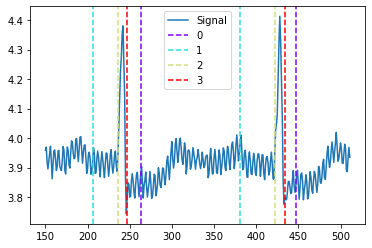

In [22]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:2],
                       waves_peak['ECG_P_Peaks'][:2],
                       waves_peak['ECG_Q_Peaks'][:2],
                       waves_peak['ECG_S_Peaks'][:2]], signal[150:2*period+150])

In [19]:
wave_peak_wrt_r = {}

chiavi = list(waves_peak.keys())

for i in range(10):
    wave_peak_wrt_r[chiavi[i]] = waves_peak[chiavi[i]] - picchi
    
wave_peak_wrt_r

{'ECG_P_Peaks': array([-35, -47, -52, -47, -47, -48, -38, -54, -38, -39, -34, -35, -42,
        -40, -39, -41, -41, -39, -46, -45, -46, -50, -46, -49, -46, -51,
        -37, -37, -46, -46, -46, -45, -38, -46, -42, -46, -45, -46, -46,
        -43, -43, -44, -46, -44, -47, -45, -42, -44, -45, -45, -45, -37,
        -44, -41, -37, -44, -44, -44, -44, -36, -47, -43, -45, -42, -45,
        -47, -44, -45, -42, -42, -43, -46, -42, -45, -48, -45, -46, -44,
        -45, -43, -47, -41, -45, -41]),
 'ECG_P_Onsets': array([-38, -49, -54, -49, -49, -50, -40, -56, -40, -41, -37, -37, -44,
        -42, -40, -44, -44, -41, -48, -52, -49, -52, -49, -52, -49, -53,
        -39, -39, -49, -48, -49, -47, -40, -47, -43, -49, -47, -48, -48,
        -45, -44, -47, -48, -46, -50, -48, -43, -46, -48, -52, -47, -38,
        -47, -43, -39, -49, -47, -47, -46, -39, -49, -46, -49, -43, -47,
        -50, -45, -47, -44, -43, -45, -49, -44, -48, -51, -48, -49, -46,
        -51, -43, -50, -43, -48, -42]),
 'ECG_P_Offse

In [23]:
# calcolo punti d'interesse anche per il segnale medio
signal = df['mean']
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

TypeError: NeuroKit error: signal_smooth(): 'size' should be between 1 and length of the signal.

In [ ]:
waves_peak

In [63]:
df_peaks = pd.DataFrame(wave_peak_wrt_r)

In [64]:
df_peaks.to_csv(r'HB_I03/Peaks.csv', index = False)

# each peak with respetc to the R peak for the 91 beats

In [ ]:
# computing the peaks and other interesting points on the mean vector



# I04

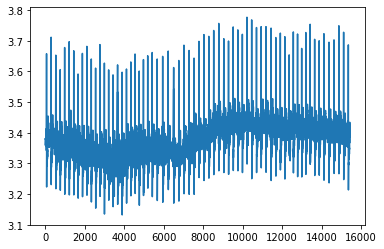

In [23]:
signal = df1['I04']
plt.plot(signal)

In [24]:
# estraggo i R peaks

freq = 257
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)

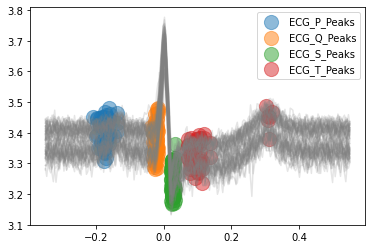

In [25]:
# estraggo tutti gli altri punti di interesse
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [68]:
waves_dwt

{'ECG_P_Peaks': [253,
  484,
  707,
  932,
  1168,
  1384,
  1606,
  1821,
  2052,
  2278,
  2499,
  2716,
  2941,
  3157,
  3378,
  3611,
  3840,
  4057,
  4278,
  4498,
  4709,
  4930,
  5136,
  5362,
  5619,
  5896,
  6179,
  6447,
  6709,
  6972,
  7238,
  7485,
  7732,
  7984,
  8231,
  8482,
  8740,
  9001,
  9222,
  9465,
  9706,
  9932,
  10164,
  10405,
  10642,
  10884,
  11131,
  11382,
  11622,
  11859,
  12081,
  12302,
  12512,
  12729,
  12933,
  13150,
  13361,
  13592,
  13824,
  14065,
  14317,
  14568,
  14820,
  15067,
  15304],
 'ECG_P_Onsets': [249,
  482,
  704,
  929,
  1164,
  1382,
  1602,
  1818,
  2049,
  2276,
  2496,
  2712,
  2939,
  3150,
  3376,
  3607,
  3838,
  4054,
  4275,
  4495,
  4707,
  4927,
  5133,
  5359,
  5617,
  5893,
  6175,
  6445,
  6706,
  6968,
  7235,
  7482,
  7730,
  7980,
  8228,
  8480,
  8737,
  8998,
  9220,
  9462,
  9703,
  9930,
  10161,
  10402,
  10639,
  10881,
  11127,
  11379,
  11620,
  11856,
  12078,
  12300,
  12510

### Calcolo la media della distanza tra gli R peaks

In [28]:
rpeaks

{'ECG_R_Peaks': array([  120,   307,   517,   684,   867,  1051,  1232,  1416,  1624,
         1786,  1965,  2143,  2321,  2496,  2614,  2859,  3037,  3213,
         3385,  3561,  3734,  3911,  4088,  4266,  4449,  4635,  4821,
         4956,  5200,  5389,  5581,  5772,  5876,  5979,  6158,  6347,
         6536,  6727,  6934,  7106,  7292,  7478,  7662,  7844,  7950,
         8051,  8217,  8400,  8581,  8762,  8942,  9153,  9309,  9486,
         9664,  9838, 10014, 10187, 10294, 10542, 10713, 10885, 11054,
        11224, 11395, 11505, 11750, 11923, 12092, 12263, 12603, 12769,
        12937, 13103, 13269, 13435, 13602, 13770, 13937, 14108, 14277,
        14448, 14617, 14789, 14959, 15129, 15301]),
 'sampling_rate': 257}

In [35]:
picchi = rpeaks['ECG_R_Peaks']
length = len(picchi)

sum = 0

for i in range(length - 1):
    sum += picchi[i + 1] - picchi[i]
    
semi_period = int(sum/(length - 1)/2)
semi_period

117

In [36]:
print("numero battiti: " + str(length))

period = semi_period*2+1
period


numero battiti: 65


235

In [37]:
single_hb = np.zeros([period,length])

# ogni colonna è un battito

# balzo il primo battio 
for i in range(length - 1):
    single_hb[:,i] = signal[picchi[i]-semi_period:picchi[i]+semi_period + 1]
    

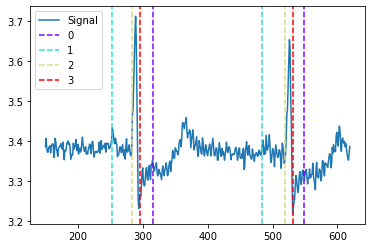

In [39]:
plot = nk.events_plot([waves_dwt['ECG_T_Peaks'][:2],
                       waves_dwt['ECG_P_Peaks'][:2],
                       waves_dwt['ECG_Q_Peaks'][:2],
                       waves_dwt['ECG_S_Peaks'][:2]], signal[150:2*period+150])

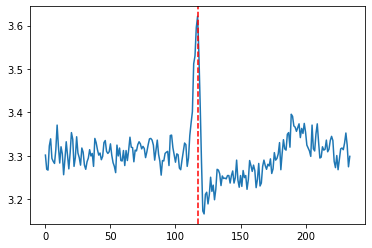

In [29]:
i = 15

plt.plot(single_hb[:,i])
plt.axvline(x = semi_period, color='r', linestyle='--')

In [30]:
for i in range(length):
    vertical_shift = (single_hb[0,i] + single_hb[-1,i])/2
    single_hb[:,i] -= vertical_shift


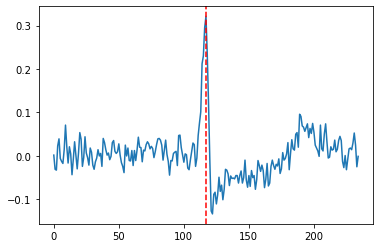

In [31]:
i = 15

plt.plot(single_hb[:,i])
plt.axvline(x = semi_period, color='r', linestyle='--')

In [32]:
hb_dic = {}

for i in range(length):
    hb_dic[i] = single_hb[:,i]

df = pd.DataFrame(hb_dic)

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.003842,0.023055,0.010567,-0.018252,-0.018252,0.024496,0.011047,0.000961,-0.006724,0.004803,...,-0.012488,-0.012968,-0.020173,0.008165,0.013929,0.014409,0.000961,0.000000,0.020653,0.0
1,0.003842,0.000000,-0.003842,-0.009606,-0.015370,0.002402,-0.016811,-0.024976,-0.019212,0.028818,...,-0.012488,-0.038905,-0.004803,0.006244,0.007205,0.023055,-0.016330,-0.010567,-0.007205,0.0
2,0.009606,-0.002882,-0.017291,-0.016330,0.002882,-0.057157,0.001441,-0.021134,0.002882,-0.021134,...,-0.015370,-0.021614,0.033622,-0.002402,-0.005283,-0.001921,-0.013449,-0.020173,-0.015850,0.0
3,-0.001921,0.007685,-0.017291,0.000961,0.007685,-0.032181,0.002402,0.002882,-0.002882,-0.018252,...,-0.014409,-0.000480,0.024015,-0.012968,-0.030259,-0.022094,-0.020173,-0.007685,-0.011047,0.0
4,-0.003842,0.017291,-0.004803,-0.005764,-0.003842,0.006244,0.007205,0.002882,0.015370,0.012488,...,-0.021134,0.038905,0.004803,-0.004323,-0.013929,-0.016330,0.009606,0.008646,-0.002402,0.0


In [78]:
df.to_csv(r'HB_I04/Signals.csv', index = False)

Da questo shift devo determinare gli altri punti di interesse in relazione al picco

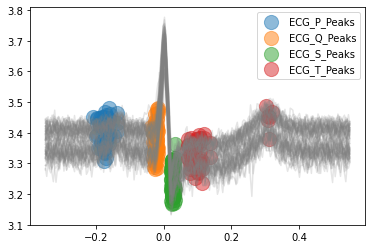

In [79]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [81]:
wave_peak_wrt_r = {}

chiavi = list(waves_peak.keys())

for i in range(10):
    wave_peak_wrt_r[chiavi[i]] = waves_peak[chiavi[i]] - picchi
    
wave_peak_wrt_r

{'ECG_P_Peaks': array([-36, -42, -44, -42, -38, -51, -47, -52, -47, -46, -43, -46, -45,
        -46, -46, -45, -44, -49, -48, -42, -44, -36, -46, -47, -43, -44,
        -42, -50, -48, -46, -41, -44, -46, -46, -46, -43, -42, -36, -54,
        -47, -41, -45, -46, -44, -51, -45, -43, -49, -49, -42, -46, -46,
        -47, -44, -49, -42, -51, -47, -44, -44, -49, -51, -46, -40, -42]),
 'ECG_P_Onsets': array([-40, -44, -47, -45, -42, -53, -51, -55, -50, -48, -46, -50, -47,
        -53, -48, -49, -46, -52, -51, -45, -46, -39, -49, -50, -45, -47,
        -46, -52, -51, -50, -44, -47, -48, -50, -49, -45, -45, -39, -56,
        -50, -44, -47, -49, -47, -54, -48, -47, -52, -51, -45, -49, -48,
        -49, -48, -51, -45, -54, -50, -47, -46, -53, -53, -53, -43, -45]),
 'ECG_P_Offsets': array([-33, -39, -43, -40, -35, -49, -46, -49, -44, -43, -41, -44, -42,
        -43, -43, -41, -41, -47, -45, -39, -42, -32, -43, -44, -40, -42,
        -39, -48, -46, -45, -38, -42, -44, -44, -44, -41, -40, -34, -51,

In [82]:
df_peaks = pd.DataFrame(wave_peak_wrt_r)

In [83]:
df_peaks.to_csv(r'HB_I04/Peaks.csv', index = False)

# each peak with respetc to the R peak for the 91 beats

# I05

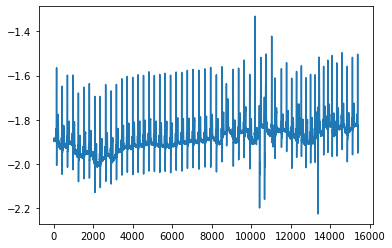

In [84]:
signal = df1['I05']

plt.plot(signal)

In [86]:
# estraggo i R peaks

freq = 257
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)

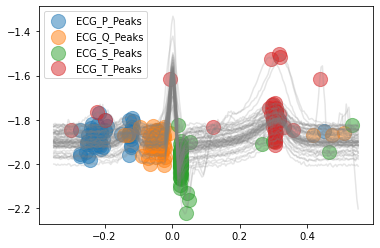

In [87]:
# estraggo tutti gli altri punti di interesse
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [88]:
waves_dwt

{'ECG_P_Peaks': [88,
  364,
  657,
  935,
  1176,
  1457,
  1735,
  2017,
  2319,
  2596,
  2833,
  3141,
  3392,
  3666,
  3966,
  4241,
  4489,
  4786,
  5028,
  5307,
  5608,
  5857,
  6165,
  6448,
  6733,
  7022,
  7290,
  7594,
  7887,
  8181,
  8465,
  8685,
  9058,
  9332,
  9590,
  9862,
  10136,
  10374,
  10617,
  10985,
  11153,
  11471,
  11722,
  11991,
  12269,
  12379,
  12510,
  12716,
  12942,
  13176,
  13314,
  13640,
  13849,
  14043,
  14284,
  14544,
  14809,
  15067,
  15328],
 'ECG_P_Onsets': [84,
  357,
  644,
  921,
  1172,
  1452,
  1729,
  2013,
  2306,
  2583,
  2827,
  3127,
  3383,
  3655,
  3952,
  4228,
  4481,
  4774,
  5024,
  5303,
  5596,
  5850,
  6152,
  6435,
  6719,
  7008,
  7286,
  7587,
  7868,
  8178,
  8457,
  8672,
  9047,
  9318,
  9584,
  9858,
  10126,
  10364,
  10611,
  10977,
  11151,
  11468,
  11719,
  11985,
  12254,
  12368,
  12496,
  12710,
  12938,
  13171,
  13289,
  13625,
  13833,
  14037,
  14264,
  14532,
  14801,
  1505

### Calcolo la media della distanza tra gli R peaks

In [89]:
rpeaks

{'ECG_R_Peaks': array([  141,   417,   690,   967,  1246,  1521,  1801,  2080,  2352,
         2628,  2903,  3173,  3446,  3721,  3998,  4273,  4545,  4819,
         5093,  5367,  5641,  5916,  6198,  6481,  6765,  7054,  7350,
         7652,  7946,  8237,  8520,  8745,  9090,  9363,  9641,  9926,
        10200, 10413, 10667, 11039, 11207, 11531, 11792, 12051, 12299,
        12430, 12543, 12771, 13007, 13237, 13370, 13670, 13880, 14104,
        14335, 14601, 14866, 15129, 15394]),
 'sampling_rate': 257}

In [90]:
picchi = rpeaks['ECG_R_Peaks']
length = len(picchi)

sum = 0

for i in range(length - 1):
    sum += picchi[i + 1] - picchi[i]
    
semi_period = int(sum/(length - 1)/2)
semi_period

131

In [91]:
print("numero battiti: " + str(length))

period = semi_period*2+1
period


numero battiti: 59


263

In [92]:
single_hb = np.zeros([period,length])

# ogni colonna è un battito

# balzo il primo battio 
for i in range(length - 1):
    single_hb[:,i] = signal[picchi[i]-semi_period:picchi[i]+semi_period + 1]
    

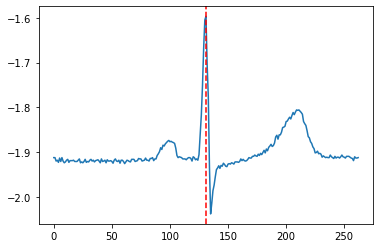

In [93]:
i = 15

plt.plot(single_hb[:,i])
plt.axvline(x = semi_period, color='r', linestyle='--')

In [94]:
for i in range(length):
    vertical_shift = (single_hb[0,i] + single_hb[-1,i])/2
    single_hb[:,i] -= vertical_shift


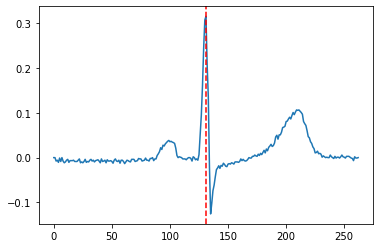

In [95]:
i = 15

plt.plot(single_hb[:,i])
plt.axvline(x = semi_period, color='r', linestyle='--')

In [96]:
hb_dic = {}

for i in range(length):
    hb_dic[i] = single_hb[:,i]

df = pd.DataFrame(hb_dic)

In [97]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.010086,-0.007685,-0.002402,0.020173,0.008646,-0.006724,2.881844e-03,0.025937,-0.011527,-0.006724,...,-0.056676,0.059558,-0.012008,0.038905,0.024976,-0.011047,0.000000,0.003842,-0.008646,0.0
1,0.007205,-0.000961,-0.004323,0.021134,0.001921,-0.005764,9.606148e-04,0.024015,-0.022094,-0.006724,...,-0.063401,-0.019212,-0.025456,0.048511,0.023055,-0.023535,-0.000961,0.007685,-0.010567,0.0
2,0.011047,-0.000961,-0.006244,0.018252,0.002882,-0.003842,-3.842459e-03,0.024976,-0.024976,-0.004803,...,-0.058598,-0.173871,-0.029299,0.036023,0.020173,-0.016811,0.001921,0.003842,-0.009606,0.0
3,0.016811,-0.009606,-0.010086,0.015370,0.006724,-0.001921,-4.803074e-03,0.025937,-0.015370,-0.007685,...,-0.060519,-0.192123,-0.030259,0.035062,0.025937,-0.010086,-0.000961,0.002882,-0.014409,0.0
4,0.011047,-0.005764,-0.002402,0.015370,0.014409,-0.005764,2.220446e-16,0.024015,-0.013449,-0.010567,...,-0.072046,-0.160423,-0.017771,0.032181,0.023055,-0.011047,0.002882,0.004803,-0.013449,0.0


In [99]:
df.to_csv(r'HB_I05/Signals.csv', index = False)

Da questo shift devo determinare gli altri punti di interesse in relazione al picco

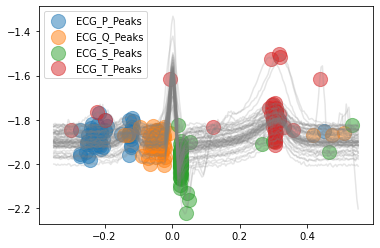

In [100]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [101]:
wave_peak_wrt_r = {}

chiavi = list(waves_peak.keys())

for i in range(10):
    wave_peak_wrt_r[chiavi[i]] = waves_peak[chiavi[i]] - picchi
    
wave_peak_wrt_r

{'ECG_P_Peaks': array([-53, -53, -33, -32, -70, -64, -66, -63, -33, -32, -70, -32, -54,
        -55, -32, -32, -56, -33, -65, -60, -33, -59, -33, -33, -32, -32,
        -60, -58, -59, -56, -55, -60, -32, -31, -51, -64, -64, -39, -50,
        -54, -54, -60, -70, -60, -30, -51, -33, -55, -65, -61, -56, -30,
        -31, -61, -51, -57, -57, -62, -66]),
 'ECG_P_Onsets': array([-57, -60, -46, -46, -74, -69, -72, -67, -46, -45, -76, -46, -63,
        -66, -46, -45, -64, -45, -69, -64, -45, -66, -46, -46, -46, -46,
        -64, -65, -78, -59, -63, -73, -43, -45, -57, -68, -74, -49, -56,
        -62, -56, -63, -73, -66, -45, -62, -47, -61, -69, -66, -81, -45,
        -47, -67, -71, -69, -65, -75, -70]),
 'ECG_P_Offsets': array([-50, -50, -22, -21, -65, -61, -58, -53, -22, -21, -56, -22, -49,
        -51, -20, -22, -52, -21, -59, -55, -21, -50, -21, -22, -21, -21,
        -56, -54, -55, -51, -51, -47, -21, -21, -47, -54, -59, -30, -46,
        -46, -50, -56, -64, -55, -21, -40, -21, -48, -59, -

In [102]:
df_peaks = pd.DataFrame(wave_peak_wrt_r)

In [103]:
df_peaks.to_csv(r'HB_I05/Peaks.csv', index = False)

# each peak with respetc to the R peak for the 91 beats